In [45]:
#@markdown #Importación de las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
print('Listo!')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Listo!


In [46]:
#@markdown #Importación de los Resultados
percents = ['1','5','10','20','33.33','50','99.99']
pred_RF = []
pred_LR = []
pred_PR = []
dataset = pd.read_csv('/content/drive/MyDrive/ProyectoDeGrado/Final/Datos.csv')
for p in percents:
  pred_RF.append(pd.read_csv("/content/drive/MyDrive/ProyectoDeGrado/Final/ResultadosEntrenamiento/RandomForest/Datos_Aleatorios/Ypred_{}.csv".format(p)))
  pred_LR.append(pd.read_csv("/content/drive/MyDrive/ProyectoDeGrado/Final/ResultadosEntrenamiento/LinealMultiRegression/Datos_Aleatorios/Ypred_{}.csv".format(p)))
  pred_PR.append(pd.read_csv("/content/drive/MyDrive/ProyectoDeGrado/Final/ResultadosEntrenamiento/PolyRegression/Datos_Aleatorios/Ypred_{}.csv".format(p)))
print('Listo!')

Listo!


In [47]:
#@markdown #Orden de las columnas de datos de LPSP y LOLH
LPSP_Real = pd.DataFrame(dataset.iloc[:,4].values, columns=['real'])
LPSP_RF = LPSP_Real
LPSP_LR = LPSP_Real
LPSP_PR = LPSP_Real
LOLH_Real = pd.DataFrame(dataset.iloc[:,5].values, columns=['real'])
LOLH_RF = LPSP_Real
LOLH_LR = LPSP_Real
LOLH_PR = LPSP_Real

maxLPSP = 2.5 # este valor es porcentual
maxLOLH = 5 # este valor es porcentual
minLPSP = -maxLPSP 
minLOLH = -maxLOLH
rojo = sns.light_palette(color="#FF0000", n_colors=3)
azul = sns.light_palette(color="#0000FF", n_colors=3)
print('Listo!')

Listo!


In [63]:
def makia(predict):
  filterRealDataset = dataset[(dataset.LPSP < maxLPSP) & (dataset.LOLH < maxLOLH)]
  print("Posición Optima:\nPosicion: ", filterRealDataset.COST.idxmin()+1,
      "\nCOSTO: ", filterRealDataset.COST.min())

  predictDataset = predict.iloc[:,1:4]
  filterDataset = predictDataset[(predictDataset.LPSP <= maxLPSP) & (predictDataset.LOLH <= maxLOLH)]
  print("Posición predicción:\nPosicion: ", filterDataset.COSTO.idxmin()+1,
      "\nCOSTO: ", filterDataset.COSTO.min())
  
  n = filterDataset.COSTO.idxmin()+1
  n -= 1
  datosPrediccion = predict.iloc[n,1:4]
  print("\nCantidad de:")
  print(" Nd: ", dataset['Nd'][n], "\n", "Nw: ", dataset['Nw'][n], "\n", "Np: ", dataset['Np'][n], "\n", "Nb: ", dataset['Nb'][n], "\n")
  print("Datos reales:")
  print(" LPSP: ", dataset['LPSP'][n], "\n", "LOLH: ", dataset['LOLH'][n], "\n", "COST: ", dataset['COST'][n], "\n")
  print("Datos obtenidos con la predicción:")
  print(" LPSP: ", datosPrediccion[0], "\n", "LOLH: ", datosPrediccion[1], "\n", "COST: ", datosPrediccion[2], "\n")

  #errorLPSP = error_relativo(dataset['LPSP'][n], datosPrediccion[0])
  #errorLOLH = error_relativo(dataset['LOLH'][n], datosPrediccion[1])
  #errorCOST = error_relativo(dataset['COST'][n], datosPrediccion[2])

  #print("Error relativo porcentual")
  #print(" LPSP: ", errorLPSP, "%\n", "LOLH: ", errorLOLH, "%\n", "COST: ", errorCOST, "%\n")

n=6
makia(pred_RF[n])
print(percents[n])

Posición Optima
Posicion:  108552 
COSTO:  115887.0382
Posición predicción
Posicion:  108552 
COSTO:  115845.66032600004

Cantidad de:
 Nd:  2 
 Nw:  1 
 Np:  76 
 Nb:  12 

Datos reales:
 LPSP:  1.247438553 
 LOLH:  4.952054795 
 COST:  115887.0382 

Datos obtenidos con la predicción:
 LPSP:  1.2550052701399987 
 LOLH:  4.979178082579995 
 COST:  115845.66032600004 

99.99


# **MAPA DE CALOR LPSP**

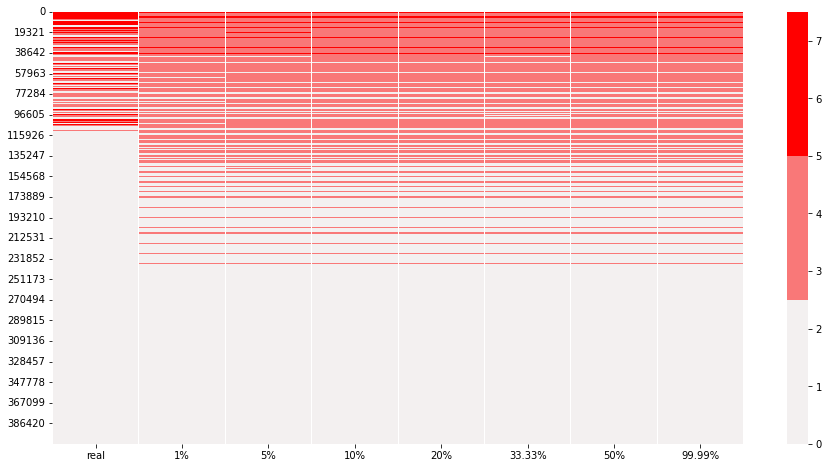

In [49]:
#@markdown #Regresión Lineal Múltiple
for i in range(0,len(percents)):
  LPSP_LR.loc[:,'{}%'.format(percents[i])] = pred_LR[i].iloc[:,1].values
sns.heatmap(LPSP_LR[:], vmax=maxLPSP*3, vmin=0, cmap=rojo);
plt.subplots_adjust(left=0, bottom=0, right=2, top=1.5, wspace=0.1, hspace=0.3)

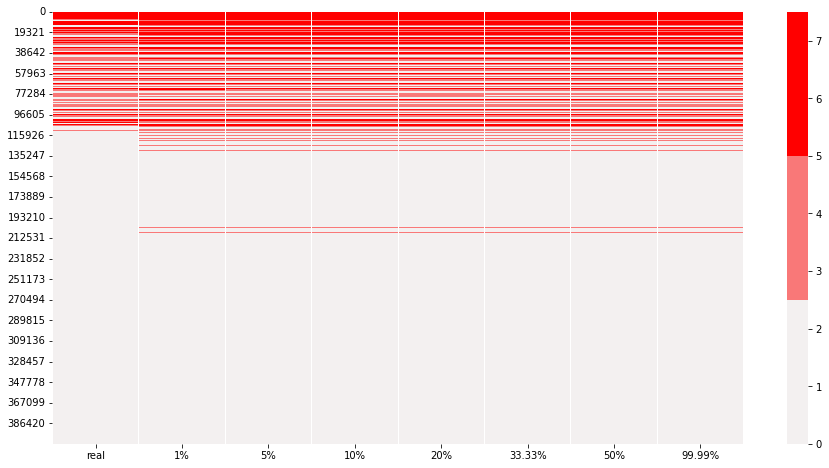

In [50]:
#@markdown #Regresión Polinómica
for i in range(0,len(percents)):
  LPSP_PR.loc[:,'{}%'.format(percents[i])] = pred_PR[i].iloc[:,1].values
sns.heatmap(LPSP_PR[:], vmax=maxLPSP*3, vmin=0, cmap=rojo);
plt.subplots_adjust(left=0, bottom=0, right=2, top=1.5, wspace=0.1, hspace=0.3)

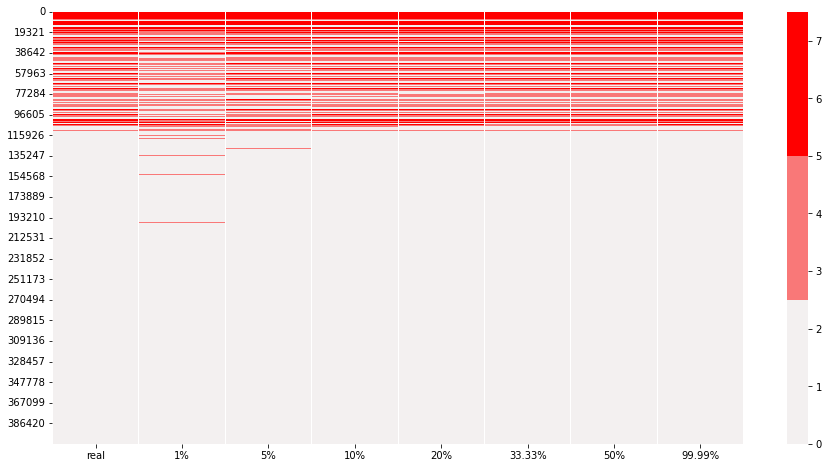

In [51]:
#@markdown #Random Forest
for i in range(0,len(percents)):
  LPSP_RF.loc[:,'{}%'.format(percents[i])] = pred_RF[i].iloc[:,1].values
sns.heatmap(LPSP_RF[:], vmax=maxLPSP*3, vmin=0, cmap=rojo);
plt.subplots_adjust(left=0, bottom=0, right=2, top=1.5, wspace=0.1, hspace=0.3)

# **MAPA DE CALOR LOLH**

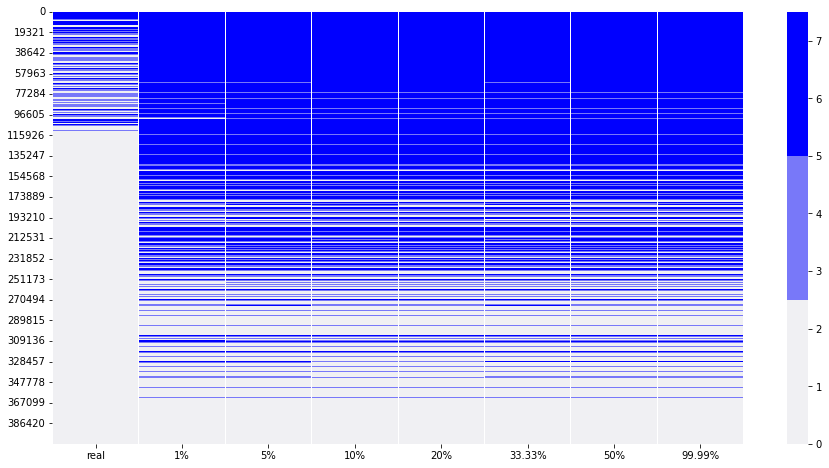

In [52]:
#@markdown #Regresión Lineal Múltiple
for i in range(0,len(percents)):
  LOLH_LR.loc[:,'{}%'.format(percents[i])] = pred_LR[i].iloc[:,2].values
sns.heatmap(LOLH_LR[:], vmax=maxLPSP*3, vmin=0, cmap=azul);
plt.subplots_adjust(left=0, bottom=0, right=2, top=1.5, wspace=0.1, hspace=0.3)

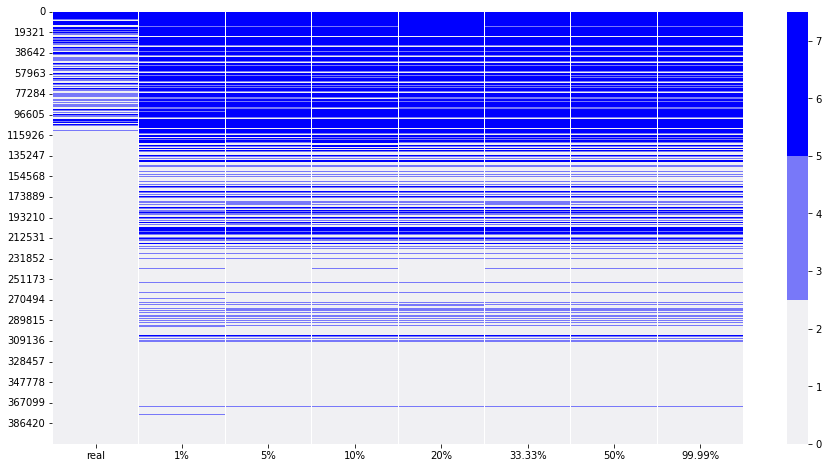

In [53]:
#@markdown #Regresión Polinómica
for i in range(0,len(percents)):
  LOLH_PR.loc[:,'{}%'.format(percents[i])] = pred_PR[i].iloc[:,2].values
sns.heatmap(LOLH_PR[:], vmax=maxLPSP*3, vmin=0, cmap=azul);
plt.subplots_adjust(left=0, bottom=0, right=2, top=1.5, wspace=0.1, hspace=0.3)

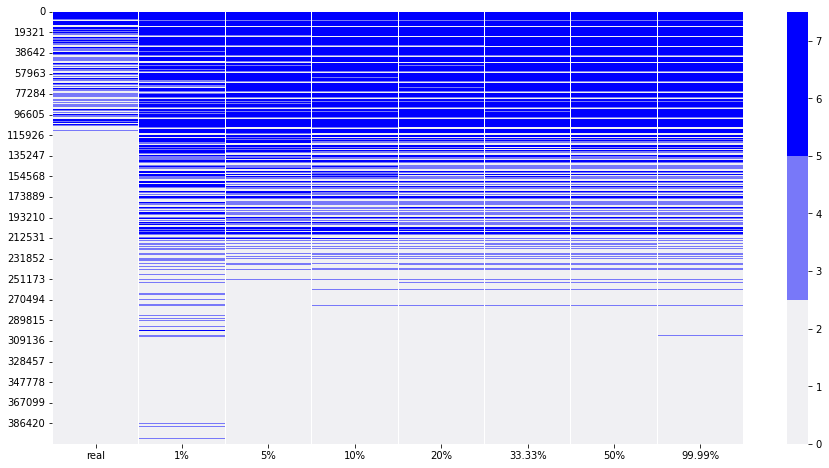

In [54]:
#@markdown #Random Forest
for i in range(0,len(percents)):
  LOLH_RF.loc[:,'{}%'.format(percents[i])] = pred_RF[i].iloc[:,2].values
sns.heatmap(LOLH_RF[:], vmax=maxLPSP*3, vmin=0, cmap=azul);
plt.subplots_adjust(left=0, bottom=0, right=2, top=1.5, wspace=0.1, hspace=0.3)